Nama: Dwi Putra Satria utama

Dashboard link: https://lookerstudio.google.com/reporting/0a527811-e75e-44ba-9b24-4ffc3bbe75df

## Assignment Problems


Membuat streategi marketing campaign yang paling efektif untuk keperluan perusahaan F&B

## Latar Belakang

Industri makanan dan minuman (F&B) seringkali perlu menghadapi tantangan dalam merumuskan strategi pemasaran yang efektif untuk mencapai tujuan bisnis perusahaan. Dalam upaya untuk meningkatkan penjualan dan kesadaran merek, perusahaan F&B perlu memperhatikan beberapa aspek penting, seperti segmentasi pelanggan, pemilihan channel pemasaran yang tepat, dan strategi kampanye yang efektif.

### Penjabaran Problems



1. Segmentasi customer apa yang cocok untuk perusahaan F&B?

2. Perusahaan menargetkan audience pada usia semua umur, chanel apa yang cocok untuk usia semua umur tersebut?

3. Chanel apa yang sekiranya akan mendapatkan conversion rate yang tinggi pada target audience semua umur?

4. Berapa rata rata acquisition cost yang diperlukan untuk mendapatkan conversion rate 0.15? (statistika deskriptif, mean)

5. Apakah terdapat hubungan conversion rate dengan jumlah klik pada kampanye pemasaran? (statistik inferensial, korelasi)

6. Chanel yang tepat pada target audiens all ages agar ROInya tinggi?

7. Campaign type yang tepat pada target audiens all ages agar ROInya tinggi?

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



In [23]:
# Referensi data : https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset?resource=download

# Data loading
df = pd.read_csv('C:\\.NON SYSTEM WINDOWS\\HACKTIV\\MILESTONE\\marketing_campaign_dataset.csv')
df


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


In [24]:
# Cek missing values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

Data clean, tidak ada missing values

In [25]:
# Menghilangkan kata "day" dari kolom 'Duration'
df['Duration'] = df['Duration'].str.replace(' days', '')

# Mengubah tipe data kolom 'Duration' menjadi numerik
df['Duration'] = pd.to_numeric(df['Duration'])

# Melakukan describe pada kolom 'Duration'
description = df['Duration'].describe()

print(description)


count    200000.000000
mean         37.503975
std          16.746720
min          15.000000
25%          30.000000
50%          30.000000
75%          45.000000
max          60.000000
Name: Duration, dtype: float64


### 1. Segmentasi customer apa yang cocok untuk perusahaan F&B?

In [26]:
# Jenis customer segment yang ada pada data
segment = df['Customer_Segment'].unique()
segment

array(['Health & Wellness', 'Fashionistas', 'Outdoor Adventurers',
       'Foodies', 'Tech Enthusiasts'], dtype=object)

Berdasarkan analisa, segmentasi yang cocok untuk perusahaan F&B adalah Foodies

In [27]:
# Membuat data frame baru bedasarkan customer segment: foodies
foodies_data = df.loc[df['Customer_Segment'] == 'Foodies']
foodies_data

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
5,6,DataTech Solutions,Display,All Ages,15,Instagram,0.07,"$9,716.00",4.36,New York,German,100,1643,1,Foodies,2021-01-06
11,12,Innovate Industries,Influencer,Men 25-34,60,Google Ads,0.05,"$17,502.00",3.59,Los Angeles,Mandarin,659,8948,1,Foodies,2021-01-12
18,19,Alpha Innovations,Social Media,Men 25-34,60,Google Ads,0.07,"$19,224.00",6.08,New York,French,182,5798,1,Foodies,2021-01-19
21,22,TechCorp,Influencer,All Ages,30,Facebook,0.02,"$12,824.00",6.21,New York,French,319,8586,2,Foodies,2021-01-22
27,28,TechCorp,Email,Men 25-34,30,YouTube,0.07,"$6,601.00",3.29,New York,Spanish,604,2420,3,Foodies,2021-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199967,199968,NexGen Systems,Influencer,Women 35-44,45,Website,0.05,"$18,261.00",6.60,Houston,Mandarin,398,5009,2,Foodies,2021-11-09
199975,199976,DataTech Solutions,Influencer,Women 35-44,45,Email,0.04,"$10,004.00",2.67,Houston,Mandarin,488,9955,1,Foodies,2021-11-17
199992,199993,DataTech Solutions,Social Media,Men 18-24,30,Instagram,0.10,"$12,704.00",6.56,Houston,German,930,6086,4,Foodies,2021-12-04
199996,199997,DataTech Solutions,Email,Men 25-34,15,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08


### 2. Perusahaan menargetkan audience pada usia semua umur, chanel apa yang cocok untuk usia semua umur tersebut?

In [28]:
# Mengelompokan berdasarkan campaign chanel dan target audience
chanel = foodies_data.groupby(['Channel_Used', 'Target_Audience']).size().reset_index(name='Count')

# Memfilter campaign chanel berdasarkan all ages (visualisasikan)
chanel_filter = chanel[chanel['Target_Audience'] == 'All Ages'].reset_index(drop=True)
chanel_filter

,Channel_Used,Target_Audience,Count
0,Email,All Ages,1348
1,Facebook,All Ages,1383
2,Google Ads,All Ages,1339
3,Instagram,All Ages,1376
4,Website,All Ages,1354
5,YouTube,All Ages,1325


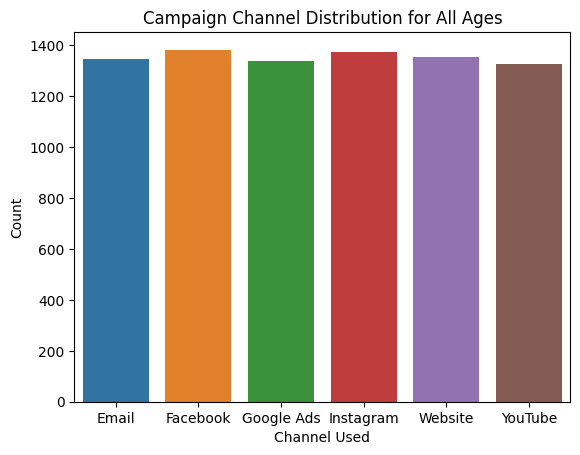

In [29]:
# Membuat visualisasi menggunakan seaborn
sns.barplot(data=chanel_filter, x='Channel_Used', y='Count')

# Membuat judul
plt.title('Campaign Channel Distribution for All Ages')

# Memberi nama pada sumbu x
plt.xlabel('Channel Used')

# Memberi nama pada sumbu y
plt.ylabel('Count')

# Membuat skala grafik
plt.show()

Berdasarkan hasil analisis, campaign chanel untuk semua umur menggunakan semua chanel. Mulai dari email, facebook, google ads, instagram, website, youtube. Sehingga perusahaan F&B dapat menggunakan semua chanel untuk keperluan campaign pada target semua umur.

### 3. Chanel apa yang sekiranya akan mendapatkan conversion rate yang tinggi pada target audience semua umur?

In [30]:
# Mengelompokan data berdasarkan chanel, audiens, tingkat conversi dengan menjumlah pengguna
cr = foodies_data.groupby(['Channel_Used', 'Target_Audience', 'Conversion_Rate']).size().reset_index(name='Marketer')

# Memfilter berdasarkan audiens = all ages, conversion = 0.15, dan mengurutkan berdasarkan jumlah marketer tertinggi
cr_filter = cr[(cr['Target_Audience'] == 'All Ages') & (cr['Conversion_Rate'] == 0.15)].sort_values('Marketer', ascending=False)

# Mereset index
cr_filter1 = cr_filter.reset_index(drop=True)
cr_filter1


,Channel_Used,Target_Audience,Conversion_Rate,Marketer
0,Instagram,All Ages,0.15,47
1,Email,All Ages,0.15,46
2,Facebook,All Ages,0.15,44
3,Google Ads,All Ages,0.15,44
4,Website,All Ages,0.15,44
5,YouTube,All Ages,0.15,39


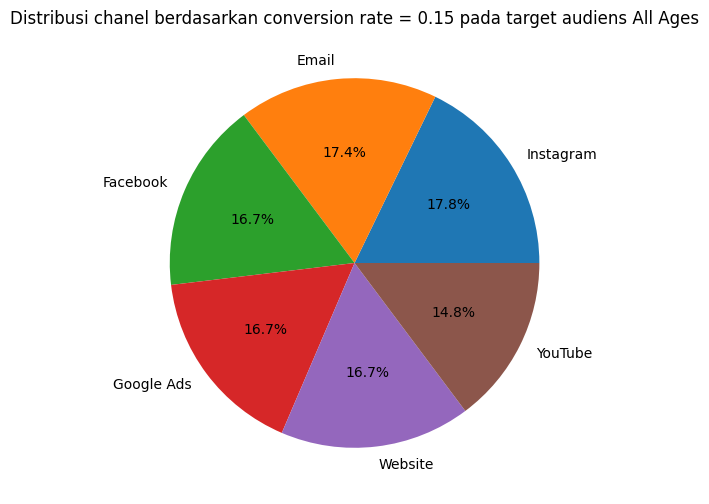

In [31]:
# Membuat visualisasi dengan plt
plt.figure(figsize=(8, 6))

# Menggunakan pie chart danmemberi label
plt.pie(cr_filter1['Marketer'], labels=cr_filter1['Channel_Used'], autopct='%1.1f%%')

# Memberikan judul
plt.title('Distribusi chanel berdasarkan conversion rate = 0.15 pada target audiens All Ages')
plt.show()


Semua chanel memiliki nilai conversion rate yang sama, tetapi instagram digunakan oleh 47 perusahaan dalam pemilihan chanel. Sehingga perusahaan dapat spent lebih banyak ke chanel instagram.


### 4. Berapa rata rata acquisition cost yang diperlukan untuk mendapatkan conversion rate 0.15 (statistika deskriptif, mean)

In [32]:
# Mengelompokan data
r_cost = foodies_data.groupby(['Conversion_Rate', 'Acquisition_Cost']).size().reset_index()

# Menghilangkan kolom index
r_cost = r_cost.drop(r_cost.columns[2], axis=1)

# Memfilter conversion rate = 0.15
r_cost = r_cost[r_cost['Conversion_Rate'] == 0.15]

# Mengubah kolom Acquisition_Cost menjadi numerik dengan menghapus karakter non-numeric
r_cost['Acquisition_Cost'] = r_cost['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

# Menghitung rata-rata acquisition cost
r_cost = r_cost['Acquisition_Cost'].mean()


r_cost


12439.35573411249

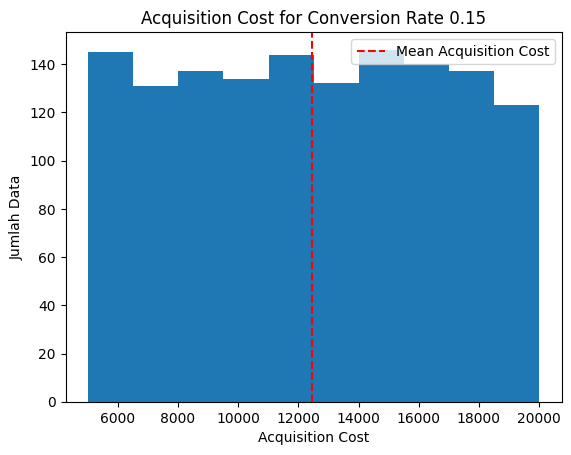

In [33]:
r_cost = foodies_data.groupby(['Conversion_Rate', 'Acquisition_Cost']).size().reset_index()
r_cost = r_cost.drop(r_cost.columns[2], axis=1)
r_cost = r_cost[r_cost['Conversion_Rate'] == 0.15]
r_cost['Acquisition_Cost'] = r_cost['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)
mean_acquisition_cost = r_cost['Acquisition_Cost'].mean()

plt.hist(r_cost['Acquisition_Cost'], bins=10)
plt.axvline(mean_acquisition_cost, color='red', linestyle='--', label='Mean Acquisition Cost')
plt.xlabel('Acquisition Cost')
plt.ylabel('Jumlah Data')
plt.title('Acquisition Cost for Conversion Rate 0.15')
plt.legend()
plt.show()


Berdasarkan perhitungan rata rata, acquisition cost yang diperlukan untuk mendapatkan nilai conversi rate = 0.15 sebesar $12439. Sehingga perusahaan dapat melakukan budgeting sebesar $12439 untuk mendapatkan nilai conversion rate = 0.15

### 5. Apakah terdapat hubungan conversion rate dengan jumlah klik pada kampanye pemasaran? (statistik inferensial, korelasi)



Tujuan analisis: Menganalisis apakah ada hubungan linier yang signifikan antara conversion rate dengan jumlah klik dalam kampanye pemasaran.

H0 (Hipotesis Nol): Tidak ada hubungan linier yang signifikan antara Conversion Rate dan jumlah klik dalam kampanye pemasaran.

H1 (Hipotesis Alternatif): Terdapat hubungan linier yang signifikan antara Conversion Rate dan jumlah klik dalam kampanye pemasaran.

In [34]:
# Menghitung koefisien korelasi dan p-value antara Acquisition Cost dan Clicks
Conversion_Rate = foodies_data['Conversion_Rate']
Clicks = foodies_data['Clicks']
correlation, p_value = pearsonr(Conversion_Rate, Clicks)

print('Koefisien Korelasi:', correlation)
print('P-value:', p_value)


Koefisien Korelasi: 0.004611167322762127
P-value: 0.35517175890985025


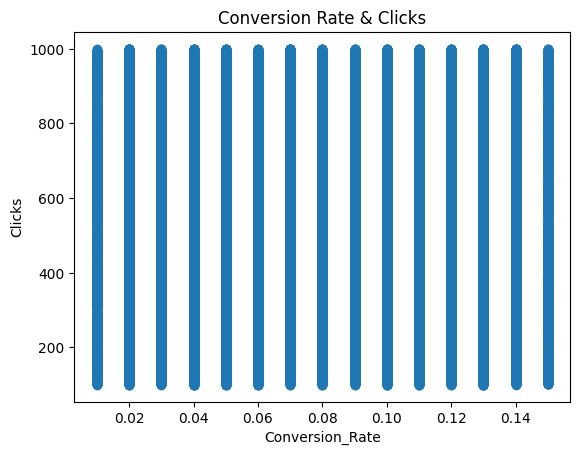

In [21]:
Conversion_Rate = foodies_data['Conversion_Rate']
Clicks = foodies_data['Clicks']

plt.scatter(Conversion_Rate, Clicks)
plt.xlabel('Conversion_Rate')
plt.ylabel('Clicks')
plt.title('Conversion Rate & Clicks')
plt.show()


Berdasarkan hasil analisis korelasi antara conversion rate dan jumlah klik dalam kampanye pemasaran, diperoleh koefisien korelasi sebesar 0.0046. Nilai koefisien korelasi yang mendekati nol menunjukkan bahwa terdapat hubungan yang sangat lemah antara conversion rate dan jumlah klik.

Selain itu, p-value yang diperoleh sebesar 0.3552, yang lebih besar dari tingkat signifikansi yang umumnya digunakan (biasanya 0.05). P-value yang besar menunjukkan bahwa tidak cukup bukti untuk menolak hipotesis nol, yang menyatakan bahwa tidak ada hubungan linier yang signifikan antara conversion rate dan jumlah klik.

Oleh karena itu, tidak ada hubungan yang kuat antara tingkat konversi dan jumlah klik. Faktor-faktor lain kemungkinan lebih mempengaruhi tingkat konversi dalam kampanye pemasaran yang diteliti seperti kualitas konten, dll.

### 6. Chanel yang tepat pada target audiens all ages agar ROInya tinggi

In [15]:
# Membuat data hanya berisi target audiens = all ages
roi = foodies_data[foodies_data['Target_Audience'] == 'All Ages']

# Mengelompokkan data
roi = roi.groupby('Channel_Used')['ROI'].max().reset_index()

# Mengurutkan data
roi = roi.sort_values('ROI', ascending=False)
roi


,Channel_Used,ROI
0,Email,8.00
3,Instagram,8.00
4,Website,8.00
5,YouTube,8.00
1,Facebook,7.99
2,Google Ads,7.96


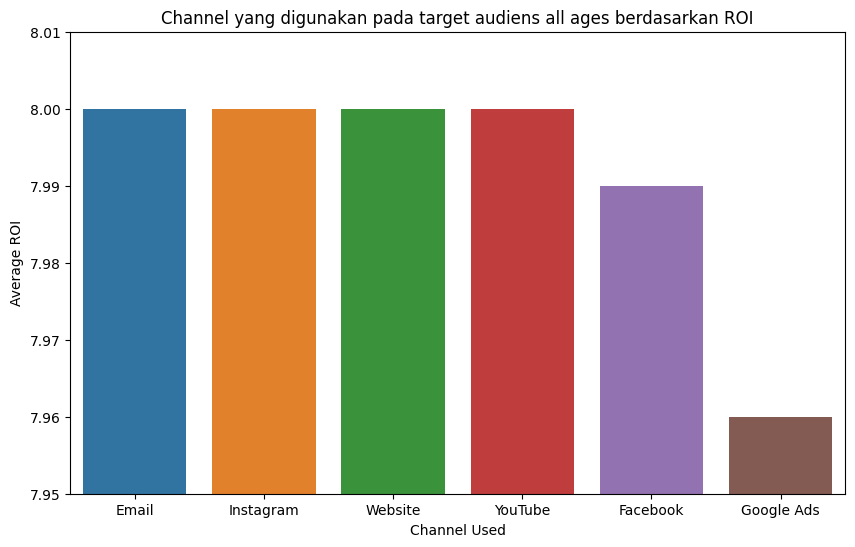

In [16]:
# Memvisualisasikan data
plt.figure(figsize=(10, 6))

# Membuat barplot dan menggunakan data untuk sumbu x dan y
sns.barplot(x='Channel_Used', y='ROI', data=roi)

# Memberi nama sumbu x
plt.xlabel('Channel Used')

# Memberi nama sumbu y
plt.ylabel('Average ROI')

# Memberi judul
plt.title('Channel yang digunakan pada target audiens all ages berdasarkan ROI')

# Skala grafik
plt.ylim(7.95, 8.01)
plt.show()


Berdasarkan analisis, perusahaan dapat fokus menggunakan chanel seperti Email, Instagram, Websitem, YouTube pada target audiens semua usia untuk dapat meningkatkan ROI kampanye pemasaran. Channel Facebook dan google ads dapat menjadi pertimbangan untuk kegiatan pemasaran.

### 7. Campaign type yang tepat pada target audiens all ages agar ROInya tinggi?

In [17]:
ctype = foodies_data[foodies_data['Target_Audience'] == 'All Ages']
ctype = ctype.groupby('Campaign_Type')['ROI'].max().reset_index()
ctype = ctype.sort_values('ROI', ascending=False)
ctype


,Campaign_Type,ROI
0,Display,8.00
2,Influencer,8.00
4,Social Media,8.00
1,Email,7.99
3,Search,7.99


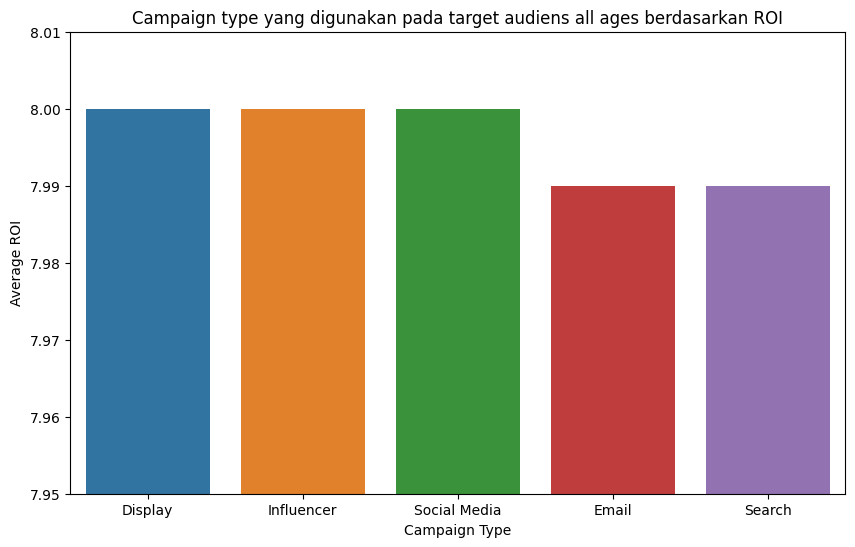

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign_Type', y='ROI', data=ctype)
plt.ylabel('Average ROI')
plt.xlabel('Campaign Type')
plt.title('Campaign type yang digunakan pada target audiens all ages berdasarkan ROI')
plt.ylim(7.95, 8.01)
plt.show()


Berdasarkan analisa, perusahaan dapat mempertimbangkan penggunaan campaign type display dan influencer sebagai pilihan utama, diikuti oleh social media dan email. Penggunaan search dapat dipertimbangkan sebagai opsi tambahan dalam kampanye yang ditujukan kepada target audiens all ages.

# Kesimpulan

Berdasarkan analisis yang dilakukan, terdapat beberapa kesimpulan dan insight yang dapat diambil untuk perusahaan F&B:

    1. Segmentasi yang paling cocok untuk perusahaan F&B adalah Foodies, yang merupakan segmen khusus untuk target audiens yang tertarik dengan makanan dan minuman.

    2. Dalam kampanye pemasaran yang ditujukan kepada target audiens semua usia, perusahaan dapat menggunakan berbagai channel seperti email, Facebook, Google Ads, Instagram, website, dan YouTube. Penggunaan semua channel ini akan membantu perusahaan mencapai audiens yang lebih luas.

    3. Meskipun semua channel memiliki conversion rate yang sama, Instagram merupakan channel yang paling banyak digunakan oleh 47 perusahaan dalam memilih channel. Oleh karena itu, perusahaan dapat mengalokasikan lebih banyak sumber daya dan dana untuk kampanye melalui Instagram.

    4. Berdasarkan perhitungan rata-rata, perusahaan perlu mengalokasikan anggaran sekitar $12,439 untuk mencapai conversion rate sebesar 0.15. Anggaran ini dapat membantu perusahaan mencapai tujuan kampanye dengan tingkat konversi yang diharapkan.

    5. Analisis korelasi antara conversion rate dan jumlah klik menunjukkan bahwa hubungan antara keduanya sangat lemah. P-value yang lebih besar dari tingkat signifikansi menunjukkan bahwa tidak ada hubungan linier yang signifikan antara conversion rate dan jumlah klik. Oleh karena itu, perusahaan perlu mempertimbangkan faktor-faktor lain seperti kualitas konten dan strategi pemasaran yang lebih holistik untuk meningkatkan tingkat konversi.

    6. Berdasarkan analisis ROI tertinggi, perusahaan dapat fokus menggunakan chanel seperti Email, Instagram, Websitem, YouTube pada target audiens semua usia untuk dapat meningkatkan ROI kampanye pemasaran. Channel Facebook dan google ads dapat menjadi pertimbangan untuk kegiatan pemasaran.

    7. Campaign type yang direkomendasikan adalah display dan influencer sebagai pilihan utama, diikuti oleh social media dan email. Penggunaan search dapat dipertimbangkan sebagai opsi tambahan dalam kampanye yang ditujukan kepada target audiens all ages.

Secara keseluruhan, perusahaan F&B perlu mempertimbangkan penggunaan channel yang tepat, mengalokasikan anggaran yang memadai, dan mengadopsi strategi pemasaran yang lebih holistik untuk mencapai tingkat konversi yang diharapkan dan meningkatkan ROI kampanye pemasaran.